<a href="https://colab.research.google.com/github/jangByeongHui/OpenSourceSWProject/blob/master/yolov3_tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [3]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 10.94 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [4]:
!curl -L "https://app.roboflow.com/ds/fqhVAiXGMj?key=L8MxYfINqI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/37_jpg.rf.87d8d12e69ebdd8eaa69c44e227d8e25.txt  
 extracting: train/37_jpg.rf.cf4c84cdf4ccf8b469edde9d8e4db2f4.jpg  
 extracting: train/37_jpg.rf.cf4c84cdf4ccf8b469edde9d8e4db2f4.txt  
 extracting: train/39_jpg.rf.2324d7aaf78a399f867ac924a1ee101f.jpg  
 extracting: train/39_jpg.rf.2324d7aaf78a399f867ac924a1ee101f.txt  
 extracting: train/39_jpg.rf.711077af2e078cce3246257fd0476036.jpg  
 extracting: train/39_jpg.rf.711077af2e078cce3246257fd0476036.txt  
 extracting: train/3_jpg.rf.dfbbd22baee138f20b1723040af38de9.jpg  
 extracting: train/3_jpg.rf.dfbbd22baee138f20b1723040af38de9.txt  
 extracting: train/40_jpg.rf.7e4745c6f5514cb0fa23f2247f9208da.jpg  
 extracting: train/40_jpg.rf.7e4745c6f5514cb0fa23f2247f9208da.txt  
 extracting: train/41_jpg.rf.d04a73a82eb17a01232ea36b45e2b8bc.jpg  
 extracting: train/41_jpg.rf.d04a73a82eb17a01232ea36b45e2b8bc.txt  
 extracting: train/42_jpg.rf.67b35032d29850b32e63283024814cbb.jpg  
 extracting: t

In [5]:
%cd /content/train

/content/train


In [6]:
%ls

090812055800_2024938685_b_jpg.rf.18e17247dc48505ef4eb97f574353ed3.jpg
090812055800_2024938685_b_jpg.rf.18e17247dc48505ef4eb97f574353ed3.txt
090812055800_2024938685_b_jpg.rf.2a508e0564378a8ce273dbfcc6305ca1.jpg
090812055800_2024938685_b_jpg.rf.2a508e0564378a8ce273dbfcc6305ca1.txt
100_jpg.rf.46426c9003a1558409aabc063f7830e2.jpg
100_jpg.rf.46426c9003a1558409aabc063f7830e2.txt
100_jpg.rf.9ef0690164f18fa821abdcf23eb79488.jpg
100_jpg.rf.9ef0690164f18fa821abdcf23eb79488.txt
102_jpg.rf.76f93451c3bb0dcecaab91818f538e1b.jpg
102_jpg.rf.76f93451c3bb0dcecaab91818f538e1b.txt
102_jpg.rf.9a79cae7d386ce0b032dcf0a1ffb4c69.jpg
102_jpg.rf.9a79cae7d386ce0b032dcf0a1ffb4c69.txt
10_jpg.rf.a41923a576187901802f1ce4947b4bee.jpg
10_jpg.rf.a41923a576187901802f1ce4947b4bee.txt
10_jpg.rf.ff0d2c7cf06951f2af9d10b490ec7dc8.jpg
10_jpg.rf.ff0d2c7cf06951f2af9d10b490ec7dc8.txt
110_jpg.rf.44d6b6d9e9595c3b7006a6906cdf18c2.jpg
110_jpg.rf.44d6b6d9e9595c3b7006a6906cdf18c2.txt
110_jpg.rf.eee6991c4aae75dd67c4c98934649163.jpg
110_

In [7]:
%mkdir labels
%mkdir images

In [8]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [9]:
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [10]:
%cat train_images_roboflow.txt

../train/images/_darknet.labels
../train/images/20210514_184836_067_saved_jpg.rf.e1771e0c323ad9d18d94e8cb88e79603.txt
../train/images/IMG_1865_JPG.rf.fd8aa34760d5c1a542f517a8c909489a.txt
../train/images/20210514_183738_053_jpg.rf.c74a3fa77e2abba513a20adbbb101cce.txt
../train/images/20210514_182605_040_saved_jpg.rf.557eb15b23b0a2f640468a518f0b747c.txt
../train/images/20210514_183513_004_jpg.rf.f23ae620547e8b6a6ed0feaa03c7c471.txt
../train/images/20210514_184310_015_saved_jpg.rf.5ae696faa8e901711d5ff9a52be9af21.txt
../train/images/20210514_183106_016_saved_jpg.rf.2b8f87afc195cd0644daf3c09ac735ff.txt
../train/images/20210514_184801_046_saved_jpg.rf.17a9aafe941ceadd2b031b5be5f59f8d.txt
../train/images/20210514_184313_093_saved_jpg.rf.38e8327587fdc52eeae229acd86275c1.txt
../train/images/20210514_184836_030_saved_jpg.rf.6f6fd477af16f9ef8e36c0c8b0a1681e.txt
../train/images/20210514_182605_016_saved_jpg.rf.9815d901446f59e117079cdfc43d2d2e.txt
../train/images/IMG_1686_JPG.rf.4c38046f1e2579ac17d

In [19]:
%cd /content/valid/

/content/valid


In [13]:
%mkdir labels
%mkdir images

In [20]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [21]:
%cd images

/content/valid/images


In [22]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [23]:
%cat valid_images_roboflow.txt

../valid/images/IMG_7835_JPG.rf.dd765e7dc6785b54d5623627a4dba244.jpg
../valid/images/IMG_7782_JPG.rf.cbb5ac2ea92ebb693b91179241100438.jpg
../valid/images/135_jpg.rf.18acd98e7d7f8b89a3a9884a4a67101f.jpg
../valid/images/IMG_7868_JPG.rf.1a4e8bef865b093157145a766b1f503f.jpg
../valid/images/IMG_7959_JPG.rf.a511c658280aa9fbcddd89d1a205130b.jpg
../valid/images/IMG_7837_JPG.rf.6b0514483aa34143799cade66ae66b9c.jpg
../valid/images/IMG_7708_JPG.rf.234df66412f7973822d128cfb3665aa3.jpg
../valid/images/IMG_7994_JPG.rf.804781255d763db82377a9b49b533909.jpg
../valid/images/114_jpg.rf.7916f4565120d16ca225dd6fe491e46e.jpg
../valid/images/IMG_7873_JPG.rf.8249d59d05759f90feafa9c05b039504.jpg
../valid/images/IMG_7671_JPG.rf.e25454100f58d9f87295cd5141a25967.jpg
../valid/images/IMG_7722_JPG.rf.00af61a6dd5e23239254ef832e8fb4d4.jpg
../valid/images/134_jpg.rf.0378e98e49d566fb2ed5f2c954914e03.jpg
../valid/images/IMG_7675_JPG.rf.7bd47b7538c93352a92d14f0a745ed0b.jpg
../valid/images/IMG_7923_JPG.rf.ce89b9a0896f94653

In [24]:
%cd /content/yolov3/data

/content/yolov3/data


In [26]:
%cat ../../train/_darknet.labels

whitecane

In [27]:
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [28]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [29]:
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [30]:
%cat roboflow.data

classes=1
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


In [31]:
%cd ../

/content/yolov3


In [38]:
!python3 train.py --data data/roboflow.data --epochs 50 --weights weights/yolov3-tiny.weights --cfg cfg/yolov3-tiny.cfg

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-tiny.cfg', data='data/roboflow.data', device='', epochs=50, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-tiny.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2021-05-18 04:22:10.413485: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Model Summary: 37 layers, 8.85237e+06 parameters, 8.85237e+06 gradients
Caching labels (8334 found, 0 missing, 4 empty, 0 duplicate, for 8338 images): 100% 8338/8338 [00:00<00:00, 9022.52it/s]
Caching labels (510 found, 0 missing, 0 empty, 0 duplicate, for 510 images): 100% 510/510 [00:00<00:00, 9474.29it/s]
Using 2 dataloader workers
Starting training for 50 epochs...

     Epoch   gpu_mem      GIoU       obj       cls 

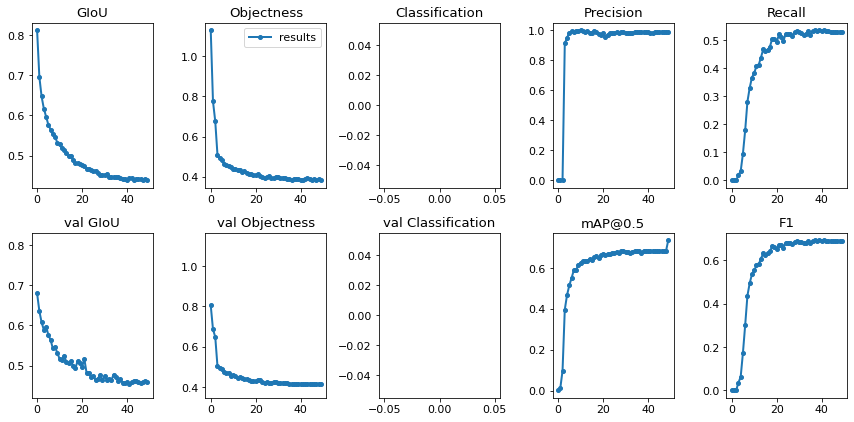

In [49]:
from utils import utils; utils.plot_results()

In [50]:
from google.colab import files
files.download('./weights/last.pt')
files.download('./weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
%pwd

'/content/yolov3'

In [53]:
%cp ./weights/last.pt ./weights/last_copy.pt
%mv ./weights/last_copy.pt /content/drive/MyDrive
%cp ./weights/best.pt ./weights/best_copy.pt
%mv ./weights/best_copy.pt /content/drive/MyDrive